In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20160612)
tf.set_random_seed(20160612)

In [4]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
num_units = 1024
x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [8]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 2674.854492, Accuracy: 0.921100
Step: 200, Loss: 2180.231445, Accuracy: 0.933400
Step: 300, Loss: 1980.723511, Accuracy: 0.938600
Step: 400, Loss: 1829.058594, Accuracy: 0.943200
Step: 500, Loss: 1411.335693, Accuracy: 0.954900
Step: 600, Loss: 1390.592041, Accuracy: 0.958900
Step: 700, Loss: 1294.857666, Accuracy: 0.961000
Step: 800, Loss: 1259.285889, Accuracy: 0.962500
Step: 900, Loss: 1251.907593, Accuracy: 0.961600
Step: 1000, Loss: 1164.970459, Accuracy: 0.963500
Step: 1100, Loss: 1148.403687, Accuracy: 0.964600
Step: 1200, Loss: 1125.466431, Accuracy: 0.963500
Step: 1300, Loss: 1056.747314, Accuracy: 0.968300
Step: 1400, Loss: 1005.849426, Accuracy: 0.969500
Step: 1500, Loss: 1082.589355, Accuracy: 0.967500
Step: 1600, Loss: 1016.798462, Accuracy: 0.968000
Step: 1700, Loss: 932.070251, Accuracy: 0.971700
Step: 1800, Loss: 928.010986, Accuracy: 0.972100
Step: 1900, Loss: 1047.898193, Accuracy: 0.969000
Step: 2000, Loss: 1009.778259, Accuracy: 0.968700


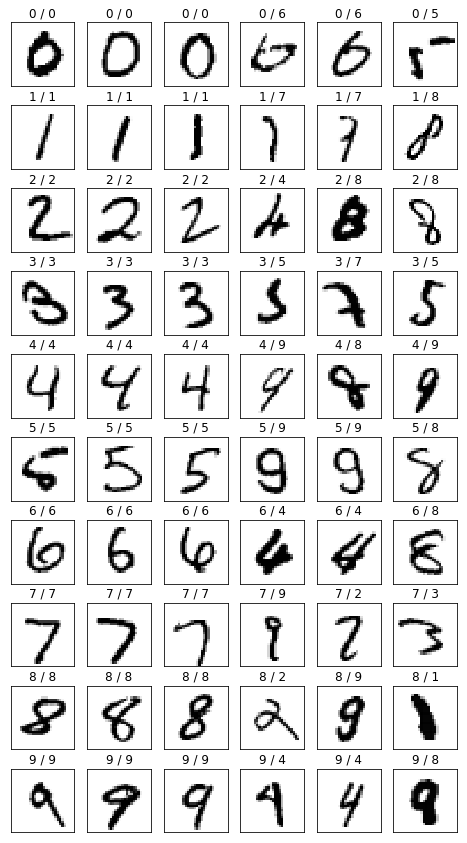

In [9]:

images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break